### 1.Create features

In [57]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Load data vào sales_df
sales_df = pd.read_csv('advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [59]:
# Create x, an array of the values from the sales_df DataFrame's "radio" column
X = sales_df[['radio']].values
# Create y, an array of the values from the sales_df DataFrame's "sales" column
y = sales_df[['sales']].values
# Reshape x into a two-dimensional Numpy array
x = x.reshape(-1, 1)
# Print the shape of x and 00y
print(x.shape)
print(y.shape)

(13638, 1)
(4546, 1)


### 2.Building a linear regression model

In [60]:
# Import LinearRegression from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression
# Instantiate a LinearRegression model
model = LinearRegression()
model.fit(X, y)
# Predict sales values using x, storing as predictions
predictions = model.predict(X)
print(predictions[:3])

[[ 95491.17119147]
 [117829.51038393]
 [173423.38071499]]


### 3.Visualizing a linear regression model

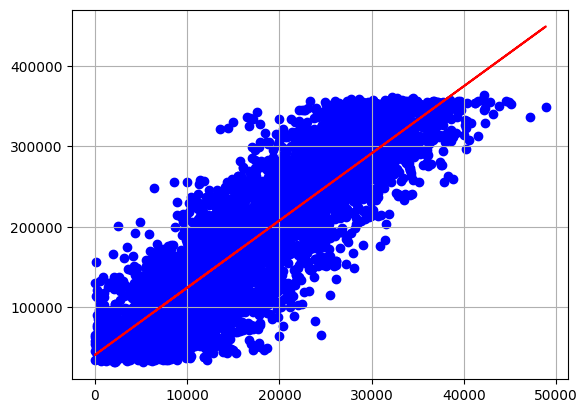

In [66]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Create a scatter plot visualizing y against x, with observations in blue
plt.scatter(X, y, color='blue')
# Draw a red line plot display the predictions against x
plt.plot(X, predictions, color='red')
# Display the plot
plt.grid()
plt.show()

### 4.Fit and predict for regression

In [ ]:
# Create x, an array containing values of all features in sales_df, and y, containing all values from the "sales" column
x = sales_df.drop(['sales', 'influencer'], axis=1).values
y = sales_df[['sales']].values

# Instantiate a LinearRegression model
model = LinearRegression()
# Fit the model to training data(70% for training, 30% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)
# Create y_pred, making predictions for sales using the test features
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[:3])
print("Actual values: ", y_test[:3])

Predictions:  [[ 53176.66154234]
 [ 70996.19873235]
 [267032.64132081]]
Actual values:  [[ 55261.28]
 [ 67574.9 ]
 [272250.11]]


### 5.Regression performance

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error
# Calculate the model's R-squared score by passing the test features and the test target
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)
# Calculate the model's root mean squared error using y_test and y_pred
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error: ", rmse)


R-squared score:  0.9990152104759368
Root mean squared error:  2944.4331996001015


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 6.Cross-validate for R-squares

In [ ]:

# Import KFold and cross_val_score
from sklearn.model_selection import KFold, cross_val_score
# Create kf by calling KFold, setting the number of splits to 6, shuffle to True, and setting a seed of 5
kf = KFold(n_splits=6, shuffle=True, random_state=5)
# Perform cross-validate using reg on x and y, passing kf to cv
cv_scores = cross_val_score(model, X, y, cv=kf)
# Print cv_scores
print("cv_scores: ", cv_scores)

cv_scores:  [0.74470218 0.7724344  0.76841901 0.74186012 0.75174985 0.7444348 ]


### 7. Analyzing cross-validation metrics

In [ ]:
# Display the mean, standard deviation, ang 95% confidence interval of cv_results
# Calculate and print the mean of the results
cv_score_mean = cv_scores.mean()
print("Mean cv_score: ", cv_score_mean)
# Calculate and print the standard deviation of cv_scores
cv_score_std = cv_scores.std()
print("Standard deviation of cv_scores: ", cv_score_std)
# Display the 95% confidence interval for the results using np.quantile()
print(np.quantile(cv_scores, [0.025, 0.975]))



Mean cv_score:  0.7539333927705617
Standard deviation of cv_scores:  0.012097455447896869
[0.74218195 0.77193247]


### 8.Regularized regression: Ridge

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
ridge_scores = []
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
# Instantiate Ridge, setting alpha to alpha 
for alpha in alphas:
    ridge =  Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


### 9.Lasso regression for fearture importance

In [63]:
# import Lasso form sklearn.linear_model
from sklearn.linear_model import Lasso
# Instantiate Lasso, setting alpha to 0.3
lasso = Lasso(alpha=0.3)
# Fit the model to the training data
lasso.fit(X_test, y_test)
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[ 3.56167532 -0.01814078  0.07721587]
